<a href="https://colab.research.google.com/github/makhlufiaero338/tugas-machine-learning/blob/main/UTS/tabelgajiKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pip install scikit-learn

In [3]:
from google.colab import files
uploaded = files.upload()  # Anda akan diminta untuk mengunggah file

Saving Salary_Data.csv to Salary_Data.csv


In [4]:
data = pd.read_csv('Salary_Data.csv')
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
print(data.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


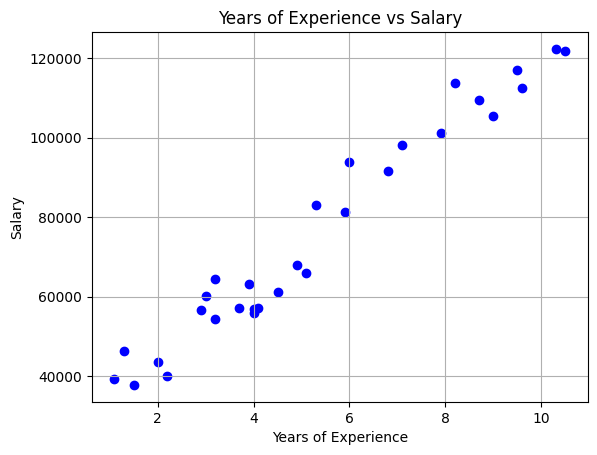

In [ ]:
plt.scatter(data['YearsExperience'], data['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

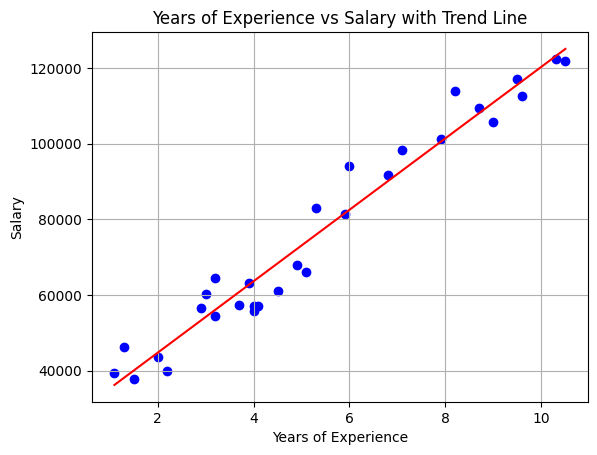

In [ ]:

# Menghitung tren linier
m, b = np.polyfit(data['YearsExperience'], data['Salary'], 1)

# Menambahkan garis tren ke plot
plt.scatter(data['YearsExperience'], data['Salary'], color='blue')
plt.plot(data['YearsExperience'], m*data['YearsExperience'] + b, color='red')  # Garis tren
plt.title('Years of Experience vs Salary with Trend Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
# Assuming your DataFrame is named 'data'
X = data[['YearsExperience']]  # Use 'YearsExperience' as the feature
y = data['Salary']  # Use 'Salary' as the target

# Now you can split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([114980.66666667,  61407.        , 105438.33333333,  80444.        ,
        57079.        ,  58656.33333333])

In [ ]:
# Melakukan prediksi
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


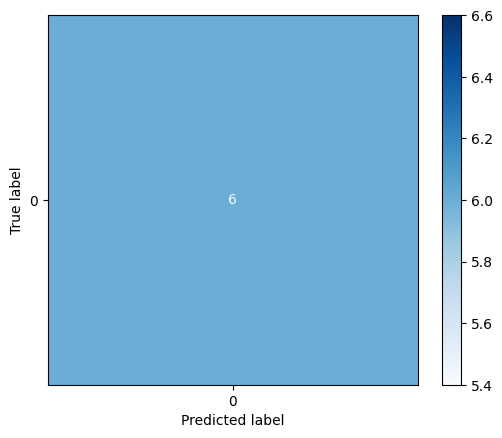

In [ ]:
# Menghitung dan menampilkan matriks kebingungan
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:

probabilities = knn.predict_proba(X_test)
print(probabilities)


[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.2 0.2 0.  0.2 0.  0.2 0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2
  0.2 0.2 0.2 0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.2 0.  0.2 0.2 0.  0.2 0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.2 0.2 0.2 0.  0.  0.2 0.  0.2 0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.2 0.2 0.  0.2 0.2 0.  0.  0.2 0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]]


In [ ]:

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:

# Assuming y_test and y_pred are defined
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error: 5502.668529399573


In [ ]:
# Mengecek kolom bertipe float64
float_columns = data.select_dtypes(include=['float64']).columns
print("Kolom bertipe float64:", float_columns.tolist())


Kolom bertipe float64: ['YearsExperience', 'Salary']
